# Introduction to Machine Learning

This Jupyter notebook was created for the 2017 AIS Intro to Machine Learning workshop and is designed to not only explain how the most common algorithms work, but also how to use Python libraries to train these algorithms to generate predictions from real datasets.

## What is Machine Learning?

Machine learning is an area in AI that is focused on using mathematical and statistical techniques to "give computers the ability to learn" without being programmed explicitly. For example, while it is not possible to come up with a 100% accurate deterministic algorithm that can differentiate between an image of a dog or a cat, it is possible to use machine learning to enable a machine to predict based on data whether an image contains a dog or a cat.

## When to Use Machine Learning

Machine learning is not for problems where we need a deterministic algorithm or an exact solution, but for problems where need to make predictions or come up with approximations. Several problems such as image classification or sentiment analysis that cannot be solved with a deterministic algorithm can be solved "approximately" with machine learning.

## Types of Machine Learning

- **Supervised learning**: used to describe algorithms that train on data with given labels or target values to develop models that can generalize to unseen data. This approach can be described as "learning from labeled examples". This is like preparing for a test with sample problems and answers already given. 
- **Unsupervised learning**: used to describe algorithms that train on data without given labels or target values. The most common example is clustering. Say you are given multiple data points that represent dogs or cats but your algorithm does not know which point is a dog and which is a cat. Then the algorithm will have to rely on unsupervised techniques to separate the points into two classes.
- **Semi-supervised learning**: falls somewhere between supervised and unsupervised learning.

### Types of Problems
- **Classification**: The goal is to train a model to identify a data point as belonging to a certain discrete class from a set of possible classes. Example: training a model to classify images as containing cars, planes, cats, frogs, dogs, etc.
- **Regression**: The goal is to train a model to use features to predict a continouous outcome or target variable. Example: training a model to predict the stock prices of a company based on many different factors.
- **Clustering**: The goal is to separate data points into groups based on similar characteristics.

## Getting Set Up

In this notebook, we will be using various Python libraries to train and test machine learning algorithms on datasets. The following software tools/libraries are necessary for this tutorial:

- **Python** (>= 2.7 or >= 3.3) (If you have 2.7 or 3.3 or higher either should be fine)
- **numpy** (for linear algebra)
- **pandas** (For working with datasets)
- **scipy** (For math/linear algebra)
- **scikit-learn** (for machine learning algorithms)

I would recommend having numpy installed and then installing scikit-learn using pip since that will install any other missing dependencies for you if necessary. 

To install a library with pip you can just go to your terminal and give the following command:

**pip install library_name**

For example, to install numpy you can just type:

**pip install numpy**

And to install scikit-learn you can type:

**pip install sklearn**

###  Optional libraries (for cool plots!)
I will be using these libraries throughout this tutorial to visualize the data, but you don't need these to run machine learning algorithms:

- **Matplotlib**
- **Seaborn**

### How to use this notebook
This notebook has several cells with Python code in them. To run a cell, click on the cell and then press SHIFT + ENTER. You can also go to the "Cell" menu and select "Run Cells" but it is a bit faster and easier to just use the SHIFT + ENTER keyboard shortcut.

## Importing Libraries

Here we will import the libraries that we will need for now.

In [1]:
import numpy as np
import pandas as pd
import sklearn

# The libraries below are optional:
import matplotlib.pyplot as plt # plt is a short name we can use to refer to this library
import seaborn as sns # sns is a short name we can use to refer to this library
%matplotlib inline

## Reading in the Data - Titanic Dataset

For this part of the tutorial, we will be using a classic dataset that contains information about passengers on 
the Titanic and tells us whether or not they survived. Our goal is to build an accurate machine learning model that can determine, based on some information about a passenger, whether or not that passenger survived the Titanic. This dataset is available in the Github repo for this tutorial and you can also download it from here:

http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html


### Using Pandas to read and process data from CSV file

Pandas is a powerful library that allows us to create dataframe objects by reading in data from multiple sources, including CSV files and HTML tables. Pandas also allows us to process, query, and perform other operations on a dataframe object. We will begin by creating a dataframe called "titanic_data" by reading in the data from a CSV file called "titanic.csv".

In [2]:
titanic_data = pd.read_csv("titanic.csv")

Now that we have created a dataframe, we can take a look at its contents with the head() function.

In [4]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


If we want to get information about the type of data in each column we can call the info() function.

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


As you can see, this is relatively small dataset (perfect for beginners!) with only 887 entries and only 8 columns. One of the convenient things about pandas is that we can select different columns of this dataframe object and perform functions on these columns in very simple syntax. For example:

In [6]:
titanic_data[['Name', 'Age']]  #If we want to see the values in the Name and Age columns

,Name,Age
0,Mr. Owen Harris Braund,22.0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0
2,Miss. Laina Heikkinen,26.0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0
4,Mr. William Henry Allen,35.0
5,Mr. James Moran,27.0
6,Mr. Timothy J McCarthy,54.0
7,Master. Gosta Leonard Palsson,2.0
8,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,27.0
9,Mrs. Nicholas (Adele Achem) Nasser,14.0


In [7]:
# If we just want to see the first five columns of the age column
titanic_data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

### Understanding the Data (features vs. target variable)

Based on what the results of the head() and info() calls, we know that the data contains 8 variables, which consist of 7 features and 1 target that we are trying to predict.

Features:

- **Pclass**: A number from 1-3 corresponding to the class (eg. economy class) that a passenger belonged to.
- **Name**: The name of the passenger as a string.
- **Sex**: The gender male/female of the passenger.
- **Age**: The age of the passenger.
- **Siblings/Spouses Aboard**:  The number of siblings/spouses of a passenger aboard the Titanic.
- **Parents/Children Aboard**: The number of parents/children of a passenger aboard the Titanic.
- **Fare**: The fare that the passenger had to pay.

Target variable:
- **Survived**: Contains a 1 if the passenger survived and a 0 if the passenger did not.

If we want summary statistics for the data we can call the describe() function.

In [8]:
titanic_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Quick Data Visualization
Using the pairplot function from the seaborn library we can see how each variable is related.

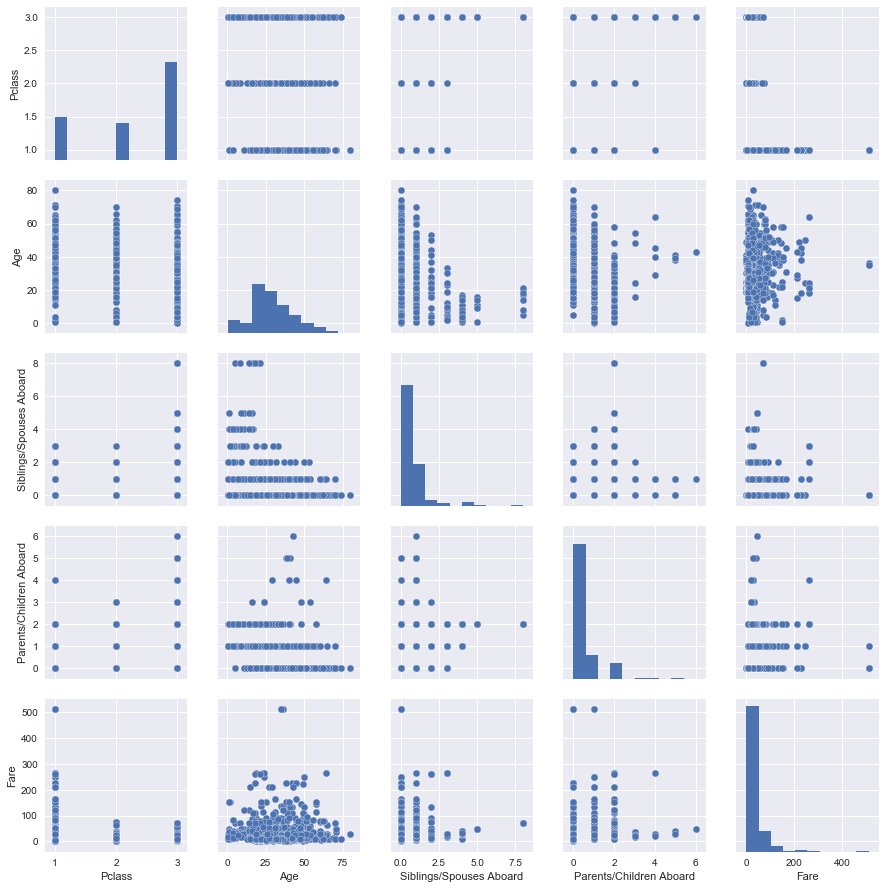

In [9]:
sns.pairplot(titanic_data.drop(['Survived'], axis=1))

## Cleaning Up the Data
One of the most common problems with unprocessed data is missing or null values. Before we can run an algorithm on the data, we need to deal with these missing or null values. Let's check if our data has any null values.

In [10]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Perfect! Since our data has no null values, we can continue to the next step of preprocessing, where we will encode nominal values.

### Label Encoding
In order for a machine learning algorithm to work on this data, we need transform it into a dataset with all numbers. So we need to convert the Gender column to numbers corresponding to the values "male" and "female". We can easily do this with scikit-learn's LabelEncoder.

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
titanic_data['Sex'] = encoder.fit_transform(titanic_data['Sex'])

In [12]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


After looking at the dataframe again, we can see that the LabelEncoder has replaced all values of "male" with 1 and all values of "female" in the "Sex" column with 0. At this point, we have done the basic preprocessing necessary and all that's left is to drop the Name column since we will not be dealing with textual data in this tutorial. We will do that in the next section where we split the data into training and testing sets.

## Train, Test, Split! 

The next step in processing our data is to split our data into a training and testing set so that we can train our machine learning algorithms on the training set and the evaluate the performance of each algorithm on the testing set. We can do this using scikit-learn's **train_test_split** tool.

In [13]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop(['Name', 'Survived'], axis=1)#Sets X equal to the dataframe without the Name and Survived columns
y = titanic_data['Survived'] # Sets y equal to the values in the Survived column 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #splits the data 

### What's going on in the code above?

There seems to be a lot going on in the code above, but its actually quite simple. We did the following:

- Created a dataframe **X** to represent the **features of the data** that we will train the model on (we have dropped the Name column since we cannot use it).
- Created a dataframe **y** to represent the **target variable** (whether or not the person survived).
- Created four dataframes using train_test_split:
    - **X_train**: represents the features in training data.
    - **X_test**: represents the features in testing data.
    - **y_train**: represents the target values in training data.
    - **y_test**: represents the target values in testing data.
    
### How train_test_split works

The train_test_split function takes our features (X) and our target values (y) and splits them into training and testing sets.
- **test_size**: Represents the proportion of the data that will be used to test the data.
- **random_state**: Just a random seed for randomly performing the split. 

Let's take a look at the four dataframes we created just to convince ourselves!

#### X_train - training data features

In [14]:
X_train.head(10) # Passing a value of 10 into the head function displays the first 10 rows

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
446,1,1,52.0,0,0,30.5000
478,2,1,37.0,0,0,0.0000
328,3,0,28.0,2,0,23.2500
798,1,1,11.0,1,2,120.0000
90,3,1,20.0,0,0,7.8542
838,1,0,30.0,0,0,31.0000
181,3,1,9.0,4,2,31.3875
465,3,1,22.0,0,0,7.7250
792,1,0,49.0,0,0,25.9292
69,2,1,32.0,0,0,10.5000


#### X_test - testing data features

In [15]:
X_test.head(10)

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
296,1,1,47.0,0,0,30.5000
682,2,1,25.0,1,2,41.5792
535,3,1,69.0,0,0,14.5000
644,1,1,56.0,0,0,35.5000
623,2,1,57.0,0,0,12.3500
39,3,0,14.0,1,0,11.2417
529,3,1,17.0,1,1,7.2292
585,3,1,22.0,0,0,8.0500
723,3,0,28.0,0,0,7.7375
141,3,0,24.0,1,0,15.8500


#### y_train - training data target values

In [16]:
y_train.head(10)

446    1
478    0
328    1
798    1
90     0
838    1
181    0
465    0
792    1
69     0
Name: Survived, dtype: int64

#### y_test - testing data target values

In [17]:
y_test.head(10)

296    1
682    0
535    0
644    1
623    0
39     1
529    0
585    0
723    1
141    1
Name: Survived, dtype: int64

## Training ML Algorithms on the Titanic Data!

Now that we've processed the data, we can finally train machine learning algorithms on this data and even evaluate the performance of each algorithm!

### K-Nearest Neighbors (KNN) - A Lazy Learning Algorithm

K-Nearest Neighbors is a very simple machine learning algorithm and it is good algorithm for demonstrating ML to beginners. It was originally designed to solve **classification** problems but the algorithm can be tweaked to solve **regression** problems as well. Here we will focus on using KNN to classify a person as having survived or not survived the Titanic.

### How it Works
K-Nearest Neighbors works by taking a data point and looking at its "k" nearest neighbors (k is an arbitrary constant that we can tune later) and then classifying the data point based on the majority of the classes of its k nearest neighbors. The simplified steps of the algorithm are described below:

1. **Training stage**: Just load all of the data! (seriously, that's it!)
2. **Classifying a point**: Find the k nearest neighbors to the point using a **distance metric** and look at the classes of these neighbors. Predict the class of the point based on the class that appears most often in the neighbors.

#### Distance Metrics:
- Euclidean distance (most common): This is what we know as the straight-line distance between two points. This distance is essentially the square root of the sums of the squares of the differences between each coordinate dimension of the two points. 
\begin{equation*}
d(p, q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2}
\end{equation*}

- Manhattan distance: The distance between two points in a grid based on only vertical or horizontal line paths.
\begin{equation*}
d(p, q) = \sum_{i=1}^n |q_i - p_i|
\end{equation*}

- Minkowski distance: A generalization of Euclidean and Manhattan distance with a paramter value of p = 2 representing Euclidean distance. Given the points:

\begin{equation*}
X = (x_1, x_2, ...., x_n)
\end{equation*}
\begin{equation*}
Y = (y_1, y_2, ...., y_n)
\end{equation*} 

The Minkowski distance of order p is:

\begin{equation*}
d(X, Y) = (\sum_{i=1}^n |x_i - y_i|^{p})^{1/p}
\end{equation*}


### Training a KNN Classifier in Python

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

As you can see above, calling fit from our KNN model produces an output where we get the details of the instance of the KNeighborsClassifier class. There are several parameters here that may look unfamiliar and the only one that we have manually set is n_neighbors. Here is what the other parameters mean:

- **metric**: (default = minkowski) the distance metric that is to be used. Note that we could provide our own distance metric in the form of a function.
- **p**: (default = 2) represents the parameter for Minkowski distance in the equation above. A value of p = 2 just means we are dealing with Euclidean distance (what we normally think of as straight-line distance). 
- **n_jobs** (default = 1): The number of parallel threads to use in training the model. Since we have a very small dataset, we can just stick with the default value.
- **metric_params** (default=None): If we specified a custom function for our distance metric, we would place the parameters of that function here.
- **weights** (default=uniform): This just specifies how much weight to give to each neighbor when generating predictions. If we specified 'distance' instead as the value, then points that are closer to the specified point would have more weight in determining the point's class.
- **algorithm** (default=auto): specifies the algorithm used for searching through points to compute nearest neighbors. I would recommend sticking with 'auto' and letting the software decide which algorithm is best. 

For more information, you can check out the SciKit-Learn documentation page for this classifier here: 
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


### Evaluating our Model
Remember how we split the data into training and testing sets? Here we are going to evaluate our model by having it generate predictions from the test data without seeing the target values in the test data. Now that we have trained our model, we will call the predict function on the test features to generate predictions and compare these predictions to the target values in the test set.

In [20]:
from sklearn.metrics import classification_report, accuracy_score
pred = KNN_model.predict(X_test)
print(classification_report(pred, y_test))
print("Our model achieved an accuracy of {} % on the test data".format(100*accuracy_score(pred, y_test)))

             precision    recall  f1-score   support

          0       0.77      0.76      0.76       168
          1       0.59      0.61      0.60        99

avg / total       0.70      0.70      0.70       267

Our model achieved an accuracy of 70.0374531835206 % on the test data


Looking at the accuracy, 70% is not bad considering that we used a very simple algorithm. Here is what the other performance measures mean:

- **precision**: the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations. For example in the row labeled 1 above, this is the number of times our model correctly predicted someone survived divided by the total number of times our model predicted someone survived.
- **recall**: the ratio of correctly predicted positive observations to all observations actually in that class. For example, in row 1, this is number of times our model predicted someone survived divided by the number of people that actually survived. 
- **f1-score**: a weighted average of precision and recall.

## Decision Trees - Naive, but readable models

Decision trees are models that are a bit more complex than the KNN algorithm, but are nevertheless readable and can perform well on simple datasets. The decision tree algorithm essentially takes all of the data and literally creates a tree of conditional statements that can then be used to classify a data point. Say for example, that you wanted to determine based on several conditions, whether or not a friend would play tennis with you. The image below represents a possible decision tree for this scenario.

<img src="dtree.png" style="width: 600px; height: 500px;"/>

### How Decision Trees Work
Now we know what a decision tree is, but the question is how does our algorithm know exactly how to construct a decision tree for a given dataset? This is where the mathematics behind this algorithm really comes into play. Decision trees use a criterion called **information gain (IG)** to determine which feature to use at each split in the tree. The algorithm begins at the root of the tree and then splits the data on the feature that results in the largest IG. We continue this process until the leaves are pure, meaning the samples at each leaf belong to the same class, allowing us to actually make a good class prediction.

#### Defining Information Gain
The information gain at each split in the tree is defined as:
\begin{equation*}
IG(D_p, f) = I(D_p) - \sum_{j=1}^m \frac {N_j}{N_p} I(D_j)
\end{equation*}

Where:

- $ f $ represents the feature on which to perform the split.
- $ D_p $ and $ D_j $ are the samples of the parent and jth child node.
- $ I $ is the impurity measure.
- $ N_j $ is the number of samples in the jth child node and $ N_p $ is the number of samples in the parent.

This equation implies that there can be an arbitrary number of children for a given node, but most libraries, especially SciKit-Learn, will implement binary decision trees for simplicity.

#### What is Impurity?
You might have noticed that we defined information gain in terms of an **impurity measure** $I$ and may be wondering what this really means. Impurity is just a measure of how pure or impure a sample is in terms of class distribution. A completely pure sample would be one in which all observations had the same class. For example, if we picked out a sample from our Titanic dataset where all of the individuals survived, then this sample would be completely pure. Impurity just measures how far away a sample is from having the same classes for each observation. There are three measures of impurity:

- **Entropy** - Defined as:
\begin{equation*}
I_H(t)=-\sum_{i=1}^c p(i|t)log_2 p(i|t)
\end{equation*}

In the equation above $p(i|t)$ represents the proportion of observations that belong to a class $c$ for a node $t$. When interpreting entropy, keep in mind that if a sample is completely pure (all observations have the same class) the entropy would just equal 0, and if we had a 50-50 split, the entropy would be 1 (maximum value). 

- **Gini index** - Defined as:
\begin{equation*}
I_G(t) = 1 - \sum_{i=1}^c p(i|t)^2
\end{equation*}

Just like entropy, the Gini index has a maximum value if the classes are distributed in a 50-50 split and a minimum value if all the observations belong to one class.

- **classification error** - Defind as:
\begin{equation*}
I_E = 1 - max(p(i|t))
\end{equation*}

Note that the max function just takes the class with the highest proportion in the case of a binary class situation (where there are two classes). So if we had a 50-50 split between classes the classification error would be 
1 - 0.5 = 0.5. If all the observations fell into one class, this value would be 1 - 1 = 0.

### Training a Decision Tree Classifier in Python

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree_model = DecisionTreeClassifier(max_depth=7, criterion='entropy', random_state=12)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=12, splitter='best')

### Evaluating our Decision Tree Model
In the same procedure as we used to evaluate our KNN model, we will have out decision tree generate predictions on the test data and compare these predictions to the expected target values for the test set.

In [26]:
pred = dtree_model.predict(X_test)
print(classification_report(pred, y_test))
print("Our model achieved an accuracy of {} % on the test data".format(100*accuracy_score(pred, y_test)))

             precision    recall  f1-score   support

          0       0.91      0.77      0.84       195
          1       0.56      0.79      0.66        72

avg / total       0.82      0.78      0.79       267

Our model achieved an accuracy of 77.90262172284645 % on the test data


Based on the results above, it seems that our decision tree did slightly better than our KNN model in terms of accuracy.